# Loan Prediction Analysis

## Loading the necessary packages

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loadig the dataset

In [12]:
df = pd.read_csv("Loan Prediction.csv")
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


## Dropping the column "Index"

In [13]:
df = df.drop("Index", axis=1)

## Checking for null values

In [14]:
df.isnull().sum()

Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

#### Observation - 
There are no null values in our dataset, thus we can move forward with our EDA

## Checking if the dataset is balanced

### Number of datapoints with column "Defaulted?" as 1

In [15]:
df[df['Defaulted?'] == 1]['Defaulted?'].count()

333

### Number of datapoints with column "Defaulted?" as 0

In [16]:
df[df['Defaulted?'] == 0]['Defaulted?'].count()

9667

#### Observation -
The dataset is imbalanced with significantly higher number of datapoints in column "Defaulted?" as 0 and significantly lower in "Defaulted?" as 1

## Balancing the dataset by Oversampling minority class using SMOTE

In [17]:
!pip install imbalanced-learn

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
X = df.drop("Defaulted?", axis=1)
y = df["Defaulted?"]

In [21]:
smote = SMOTE(random_state=42)

In [22]:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [23]:
df2 = pd.DataFrame(data=X_resampled, columns=X.columns)
df2["Defaulted?"] = y_resampled

In [24]:
df2["Defaulted?"].value_counts()

0    9667
1    9667
Name: Defaulted?, dtype: int64

In [25]:
df2.head()

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


## Graphical Representation


### Histogram for Bank Balance

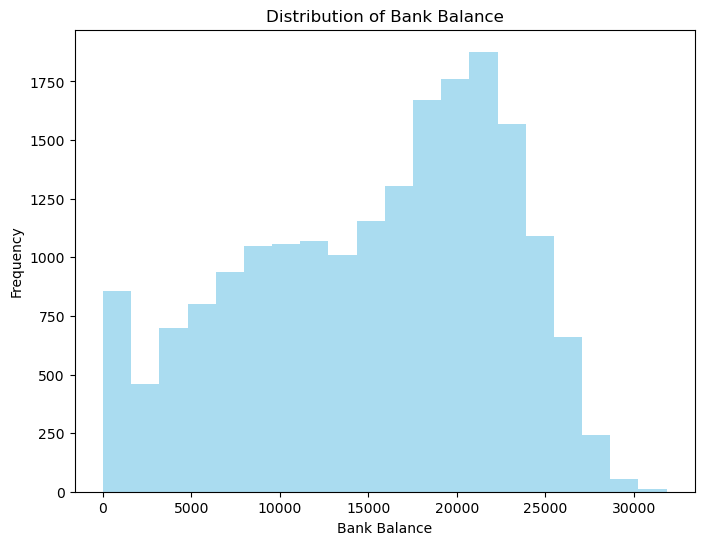

In [26]:
plt.figure(figsize=(8, 6))
plt.hist(df2['Bank Balance'], bins=20, color='skyblue', alpha=0.7)
plt.xlabel('Bank Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Bank Balance')
plt.show()

### Bar chart for Employed

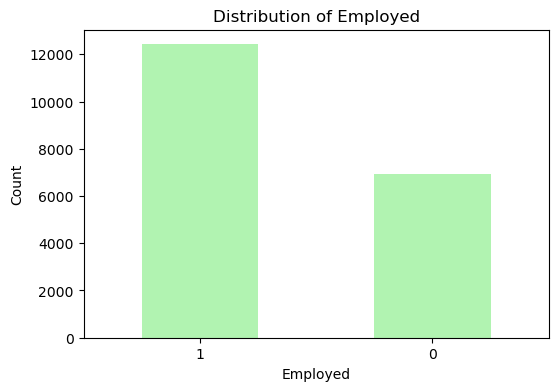

In [27]:
plt.figure(figsize=(6, 4))
df2['Employed'].value_counts().plot(kind='bar', color='lightgreen', alpha=0.7)
plt.xlabel('Employed')
plt.ylabel('Count')
plt.title('Distribution of Employed')
plt.xticks(rotation=0)
plt.show()

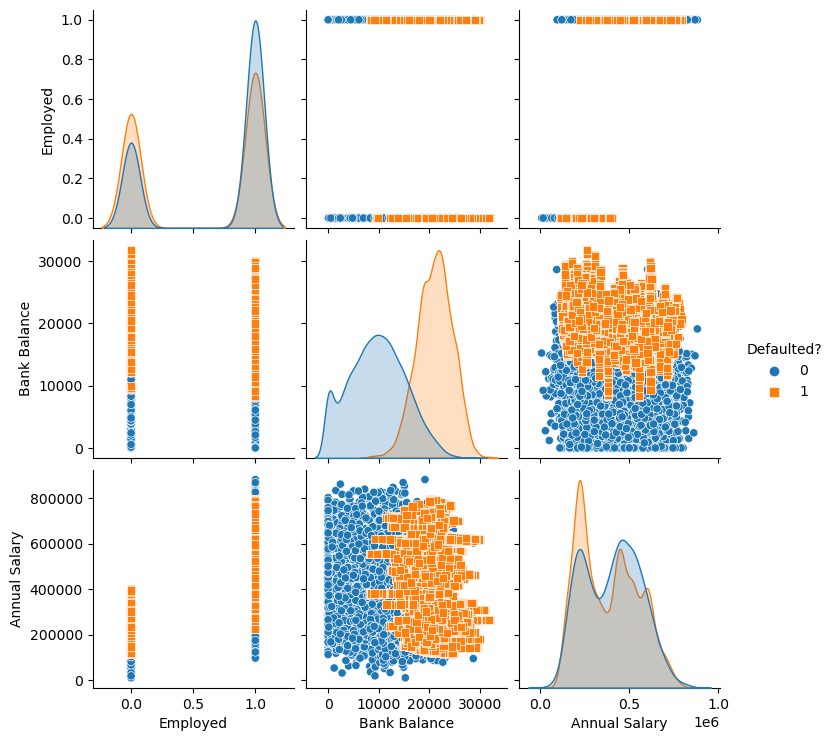

In [28]:
sns.pairplot(df2, hue='Defaulted?', markers=["o", "s"])
plt.show()

#### Observation - 
<b>Employed vs. Bank Balance:</b> There is a weak positive correlation between being employed and having a higher bank balance. This is likely because employed people have a regular income and are more likely to be able to save money.<br>
<b>Employed vs. Annual Salary:</b> There is a strong positive correlation between being employed and having a higher annual salary. This is because employed people are typically paid more than unemployed people.<br>
<b>Bank Balance vs. Annual Salary:</b> There is a strong positive correlation between bank balance and annual salary. This is likely because people with higher salaries have more money to save.<br>
<b>Defaulted? vs. Employed:</b> There is a weak negative correlation between defaulting on a loan and being employed. This is likely because employed people are more likely to be able to afford their loan payments.<br>
<b>Defaulted? vs. Bank Balance:</b> There is a moderate negative correlation between defaulting on a loan and having a higher bank balance. This is likely because people with higher bank balances have more money to cover their loan payments.<br>
<b>Defaulted? vs. Annual Salary:</b> There is a moderate negative correlation between defaulting on a loan and having a higher annual salary. This is likely because people with higher salaries have more money to cover their loan payments.


### Correlation Heatmap:

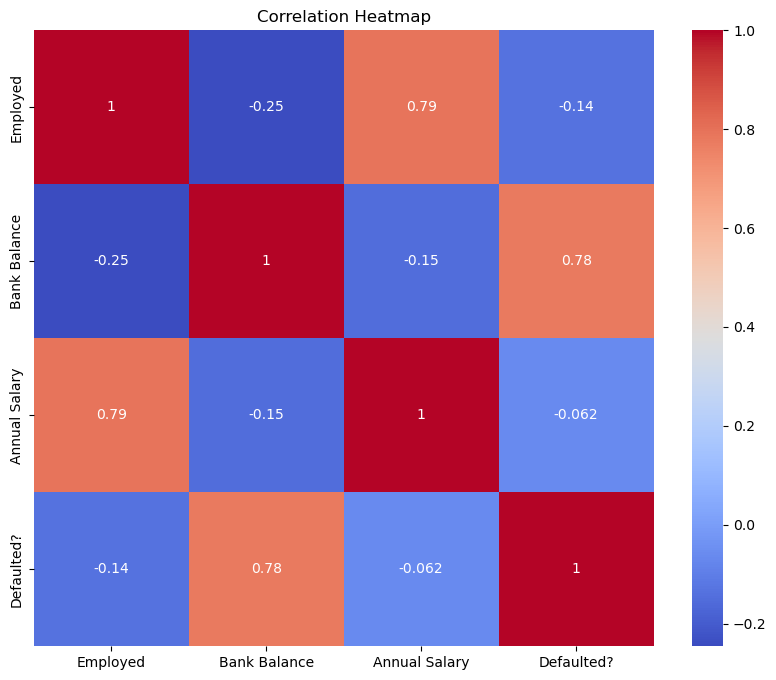

In [29]:
corr_matrix = df2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Fitting Machine Learning Model

### Splitting the entire dataset into test and train dataset with 80% data as training dataset

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df2.drop("Defaulted?", axis=1)
y = df2["Defaulted?"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Fitting RandomForestClassifier to the dataset

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
model.score(X_test,y_test)

0.9330230152573054

### Fitting DecisionTreeClassifier to the dataset

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
model_dt.score(X_test,y_test)

0.9141453322989398

### Fitting LogisticRegression to the dataset

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)

LogisticRegression()

In [41]:
model_LR.score(X_test,y_test)

0.7682958365658132

#### Observation -
Among RandomForestClassifier, DecisionTreeClassifier and LogisticRegression; RandomForestClassifier gives the highest score

## Storing the trained model Pickle files for future predictions

<b>Note: </b> A copy of the pre-trained model are already present in my Git Repository with RandomForestClassifier score - 0.9330230152573054, DecisionTreeClassifier score - 0.9141453322989398, LogisticRegression score - 0.7682958365658132. As the train_test_split splits the data randomly eachtime, thus the model accuracy is subject to change.<br>
The code used to save the pickle files are given below-
```python
import pickle

with open("model_RF_pickle",'wb') as f:
	pickle.dump(model,f)
with open("model_DT_pickle",'wb') as f:
	pickle.dump(model_dt,f)
with open("model_LR_pickle",'wb') as f:
	pickle.dump(model_LR,f)
```